# Treadmill Exercise Data Analysis

Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Reading data into dataframe

In [2]:
df = pd.read_csv("TreadmillExercise.csv")

Show head of dataframe

In [3]:
df.head()

,Date,Miles,Speed,Steps0,Steps1,TotalSteps,Steps/Mile,Calories,Weight
0,03/28/20,2,3,324,5089.00,4765,2382.25,170,NaN
1,03/28/20,3,2,5289,13786.02,8497,2832.34,255,153.0
2,03/29/20,2,2,257,5845.00,5588,2794.00,170,NaN
3,03/29/20,6,2,6683,23575.00,16892,2815.33,510,150.0
4,03/30/20,3,2,280,8787.00,8507,2835.67,255,NaN


Show shape of dataframe

In [4]:
df.shape

(103, 9)

Getting basic stats on dataframe

In [5]:
df.describe()

,Miles,Speed,Steps0,Steps1,TotalSteps,Steps/Mile,Calories,Weight
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,50.000000
mean,3.766990,2.242718,8141.155340,18882.446796,10741.291262,2861.188932,320.194175,139.780000
std,1.848178,0.474156,8701.913003,9791.460587,5414.715964,324.553615,157.095142,5.622622
min,1.000000,2.000000,77.000000,3410.000000,2484.000000,2189.330000,85.000000,131.000000
25%,2.000000,2.000000,568.500000,11002.500000,6393.500000,2804.500000,170.000000,134.625000
50%,3.000000,2.000000,4759.000000,16577.000000,9611.000000,2883.000000,255.000000,139.000000
75%,5.000000,2.000000,15276.000000,27126.500000,13976.000000,3025.000000,425.000000,144.375000
max,10.000000,4.000000,36142.000000,53891.000000,31050.000000,3952.500000,850.000000,153.000000


Total miles and steps walked, calories burned, and weight loss since starting

In [32]:
totalMilesWalked = df['Miles'].sum()
totalStepsWalked = df['TotalSteps'].sum()
totalCaloriesBurned = df['Calories'].sum()
totalWeightLoss = df['Weight'].max() - df['Weight'][len(df)-1]

print('Total miles walked: {}'.format(totalMilesWalked))
print('Total steps walked: {}'.format(totalStepsWalked))
print('Total calories burned: {}'.format(totalCaloriesBurned))
print('Total weight loss: {} lbs'.format(totalWeightLoss))

Total miles walked: 388
Total steps walked: 1106353
Total calories burned: 32980
Total weight loss: 21.5 lbs


Creating new dataframe of total steps per day

In [6]:
df_totalSteps = df.groupby('Date', as_index=False)['TotalSteps'].sum()

df_totalSteps

,Date,TotalSteps
0,03/28/20,13262
1,03/29/20,22480
2,03/30/20,24780
3,03/31/20,18322
4,04/01/20,26336
5,04/02/20,14378
6,04/03/20,39702
7,04/04/20,9132
8,04/05/20,26620
9,04/06/20,28768


Bar char of total steps per day

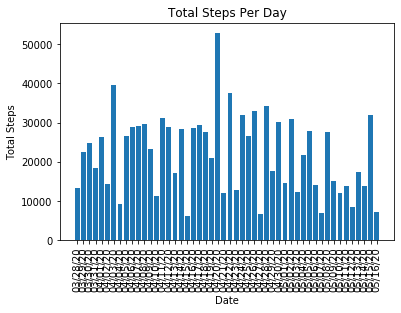

In [7]:
plt.bar(df_totalSteps['Date'],df_totalSteps['TotalSteps'])
plt.title("Total Steps Per Day")
plt.ylabel("Total Steps")
plt.xlabel("Date")
plt.xticks(rotation=90);

Create dataframe for total Miles per day

In [8]:
df_totalMiles = df.groupby('Date', as_index=False)['Miles'].sum()

df_totalMiles

,Date,Miles
0,03/28/20,5
1,03/29/20,8
2,03/30/20,10
3,03/31/20,8
4,04/01/20,10
5,04/02/20,5
6,04/03/20,14
7,04/04/20,3
8,04/05/20,9
9,04/06/20,10


Bar chart of total miles per day

7.76 miles on average per day


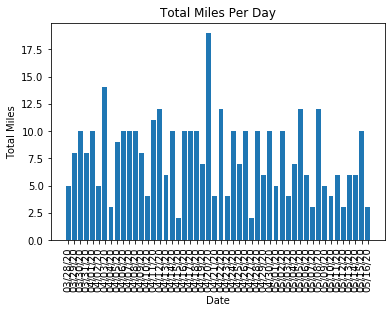

In [9]:
aveMiles = df_totalMiles['Miles'].mean()
print("{0:0.2f} miles on average per day".format(aveMiles))

plt.bar(df_totalSteps['Date'],df_totalMiles['Miles'])
plt.title("Total Miles Per Day")
plt.ylabel("Total Miles")
plt.xlabel("Date")
plt.xticks(rotation=90);

Bar chart of Steps/Mile

In [ ]:
x = np.arange(len(df))

plt.bar(x,df['Steps/Mile'])
plt.title("Steps/Mile over Time")
plt.ylabel("Steps/Mile")
plt.xlabel("Time");

Scatter plot of steps per mile

In [ ]:
plt.scatter(df['Miles'],df['TotalSteps'],color='red')
plt.title("Steps Vs Miles")
plt.ylabel("Steps")
plt.xlabel("Miles");

Split data

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

Linear regression of steps/mile over time

In [ ]:
model = LinearRegression()
train_x = np.asanyarray(df[['Miles']])
train_y = np.asanyarray(df[['TotalSteps']])
model.fit(train_x,train_y)

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

In [ ]:
plt.scatter(df['Miles'],df['TotalSteps'])
plt.title("Total Steps Vs Miles")
plt.ylabel("Steps")
plt.xlabel("Miles")

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(coefficient, intercept)
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r', label=linear_function)
plt.legend(loc='upper left')

Model Evaluation

In [ ]:
test_x = np.asanyarray(df[['Miles']])
test_y = np.asanyarray(df[['TotalSteps']])
test_y_hat = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

Miles Walked Vs. Weight Loss

In [ ]:
#df2 = df[0:80]
df_miles_weight = df.groupby('Date', as_index=False)[['Miles','Weight']].sum()

date = df_miles_weight['Date']
miles = df_miles_weight['Miles']
weight = df_miles_weight['Weight']

df_miles_weight

Line graph of weight over time

In [ ]:
weightData = df_miles_weight.iloc[-1][2]
if weightData == 0.0:
    a = len(df_miles_weight)-1
else:
    a = len(df_miles_weight)
plt.plot(date[0:a],weight[0:a],'-g')
plt.title("Weight Loss")
plt.ylabel("Weight")
plt.xlabel("Date")
plt.xticks(rotation=90);

## Linear Regression
Regression analysis on the time and weight

Will be predicting the weight after certain amount of days

Will also be predicting the days required to get to a certain amount of weight

In [ ]:
weightData = df_miles_weight.iloc[-1][2]
if weightData == 0.0:
    a = len(df_miles_weight)-1
else:
    a = len(df_miles_weight)

model = LinearRegression()

train_x = np.arange(0,a,1)
train_x = train_x.reshape(a, -1)
train_y = df_miles_weight['Weight'][0:a]

model.fit(train_x,train_y)

#print('Coefficient: ', model.coef_)
#print('Intercept: ', model.intercept_)

plt.plot(np.arange(0,a,1),weight[0:a],'-g')

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(model.coef_[0], model.intercept_)
plt.plot(np.arange(0, a, 1), model.coef_[0]*np.arange(0, a, 1) + model.intercept_, '-r', label=linear_function)
plt.title("Weight Loss")
plt.ylabel("Weight")
plt.xlabel("Number of Days from Start Date of 3/28/2020")
plt.xticks(np.arange(0, a, 2.0))
plt.legend(loc='upper right');

#Predicting the weight after a certain amount of days
predTime = 60
y_pred = model.coef_[0]*predTime + model.intercept_
print("Weight after {0:0.0f} days: {1:0.2f}".format(predTime,y_pred))

#Predicting the date when the weight goal will be achieved
weight_goal = 132
x_pred = (weight_goal - model.intercept_)/(model.coef_[0])
#newDate = np.datetime64(df_miles_weight['Date'][0]) + np.timedelta64(20, 'D')
newDate = np.datetime64('2020-03-28') + np.timedelta64(int(x_pred), 'D')
print("Weight goal is {0:0.0f} will be completed in {1:0.0f} days on".format(weight_goal,x_pred),newDate)

Regression on miles walked vs weight

In [ ]:
model = LinearRegression()

train_x = df_miles_weight[['Miles']]
train_y = df_miles_weight[['Weight']]

model.fit(train_x,train_y)

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

Plotting the points and the linear regression line

In [ ]:
plt.scatter(miles,weight)
plt.title("Miles vs Weight")
plt.xlabel("Miles")
plt.ylabel("Weight")

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(coefficient, intercept)
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r', label=linear_function)
plt.legend(loc='upper left');

Creating new dataframe with the changes in weight loss each day

In [ ]:
df_loss = df.groupby('Date', as_index=False)[['Miles','Weight']].sum()

loss = [0]
for i in range(1,len(df_loss),1):
    j = i-1
    loss.append(df_loss['Weight'][i]-df_loss['Weight'][j])

df_loss['Loss'] = loss
df_loss

Regression on miles walked vs weight loss

In [ ]:
train_x = df_loss[['Miles']]
train_y = df_loss[['Loss']]

model.fit(train_x,train_y)

print('Coefficient: ', model.coef_)
print('Intercept: ', model.intercept_)

coefficient = model.coef_[0][0]
intercept = model.intercept_[0]

linear_function = 'y = {0:0.2f}x + {1:0.2f}'.format(coefficient, intercept)
plt.plot(train_x, model.coef_[0][0]*train_x + model.intercept_[0], '-r', label=linear_function)
plt.legend(loc='upper left')

plt.scatter(df_loss['Miles'],df_loss['Loss'])
plt.title("Miles vs Weight Loss")
plt.xlabel("Miles")
plt.ylabel("Weight Loss (lbs)")

test_x = np.asanyarray(df_loss[['Miles']])
test_y = np.asanyarray(df_loss[['Loss']])
test_y_hat = model.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat, test_y))

No linear relationship between the amount of miles walked and the amount of weight loss